# [aftershoq]: A guide to creating quantum cascade structures



Author: Martin Franckie, Sept. 2018

This guide will show you how to:

- Create materials and structures
- Load structures from the library
- Generate random structures, in N-dimensions and along the Hilbert curve

First make sure your pythonpath directs to "aftershoq/" and "aftershoq/hilbert_curve/", e.g. by setting it in ~/.bash_profile/: 

export PYTHONPATH="path-to/aftershoq/:path-to/aftershoq/hilbert_curve/:$PYTHONPATH"



Creating materials:

In [1]:
from structure.materials import *
import structure.matpar as mp

well = GaAs()
barr = AlGaAs(x = 0.24)

print( str(well) + " parameters:\n")
for val in mp.valdict:
        print(val + " = " + str(well.params[mp.valdict[val]]))
        
print( "\n" + str(barr) + " parameters (x=" + str(barr.x) + "):\n")
for val in mp.valdict:
        print(val + " = " + str(barr.params[mp.valdict[val]]))


GaAs parameters:

meff = 0.067
CBO = 0.0
Eg = 1.519
Ep = 22
Alloy pot. = 0
ELO = 0.0376
eps(0) = 12.9
eps(inf) = 10.89
deform. pot. = -7.17
long. sound vel. = 4730
mass dens = 5317
mol volume = 0.04517
lattice constant = 5.653

AlGaAs parameters (x=0.24):

meff = 0.08692
CBO = 0.19943999999999998
Eg = 1.8640182399999998
Ep = 22.0
Alloy pot. = 0.18057600000000001
ELO = 0.040576
eps(0) = 12.2184
eps(inf) = 10.208400000000001
deform. pot. = -5.4492
long. sound vel. = 3594.8
mass dens = 4040.92
mol volume = 0.034329200000000004
lattice constant = 4.296279999999999


Reproducing plot of Keita Ohtani <i>et al</i>., Appl. Phys. Lett <b>103</b>, 041103 (2013)
(https://doi.org/10.1063/1.4816352)

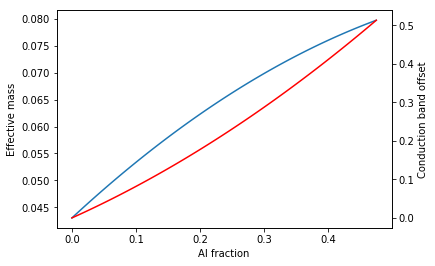

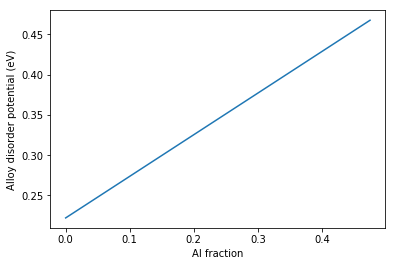

In [3]:
from matplotlib import pyplot as pl
from matplotlib.pyplot import axis 

alingaas = AlInGaAs(1)
ingaas = InGaAs()
inalas = AlInAs()

N = 100
    
ec = []
va = []
m = []
z = []
x = []
for i in range (0, N):
    z.append( float(i)/float(N) )
    x.append( z[i]*0.48 )
    alingaas.updateAlloy(z[i])
    ec.append(alingaas.params[mp.Ec]-ingaas.params[mp.Ec])
    m.append(alingaas.params[mp.meff])
    va.append(alingaas.params[mp.Valloy])
    
# reproducing plot from Ohtani APL 2013:
pl.plot(x,m)

pl.xlabel("Al fraction")
pl.ylabel("Effective mass")
ax1 = pl.gca()
ax2 = ax1.twinx()
ax2.plot(x,ec,'r')
pl.ylabel("Conduction band offset")

pl.figure(2)
pl.plot(x,va)
pl.xlabel("Al fraction")
pl.ylabel("Alloy disorder potential (eV)")
pl.show()



Creating structures:

In [4]:
from structure.classes import Structure
from utils.qcls import *

s = Structure()

s.setIFR(0.1, 6.0)

s.addLayerWM(2.0, well)
s.addLayerWM(1.1, barr)

s.addDoping(zi = 0.9, zf = 1.1, density = 2e17, layerindex = 0)

print (s)
print ("Doping layers: " + str(s.dopings) + "\n")

s2 = EV2416()

print(s2)

s2.setIFR(0.2, 6)

print (s2)

[width, Material, eta, lambda] (id=0)
[2.0, GaAs, 0.1, 6.0]
[1.1, AlGaAs, 0.1, 6.0]

Doping layers: [[0.9, 1.1, 2e+17]]

[width, Material, eta, lambda] (id=1)
[3.1, AlGaAs, 0.1, 10]
[8.5, GaAs, 0.1, 10]
[1.8, AlGaAs, 0.1, 10]
[8.7, GaAs, 0.1, 10]
[3.0, GaAs, 0.1, 10]
[6.0, GaAs, 0.1, 10]

[width, Material, eta, lambda] (id=1)
[3.1, AlGaAs, 0.2, 6]
[8.5, GaAs, 0.2, 6]
[1.8, AlGaAs, 0.2, 6]
[8.7, GaAs, 0.2, 6]
[3.0, GaAs, 0.2, 6]
[6.0, GaAs, 0.2, 6]



Generating random structures along a Hilbert curve:

In [5]:
from structure.sgenerator import Sgenerator

# Allows change of x in the barriers by ±10% (independently)
dx = [0.1, 0.0, 0.1, 0.0, 0.0, 0.0]

# Allows change of layer widths by ±1 nm
dw = [1.,1.,1.,1.,1.,1.]

# Allows change of doping start and end positions by ±0.5 nm
# and density by ±1e17 cm^-3
ddop = [0.5, 0.5 , 1e17]

sg = Sgenerator( s2, dw, dx, ddop )
    
# generate N random structures with the distribution in parameters defined above:
N = 5
sg.genRanStructs(N)

for ss in sg.structures:
    print (ss)
    print ("doping: " + str(ss.dopings[0]) + "\n")
    
# generate N random structures, along the Hilbert curve with order p
sg.structures = []
p = 5
coords = sg.genRanHilbertStructs(N, p)

for ss in sg.structures:
    print (ss)
    print ("doping: " + str(ss.dopings[0]) + "\n")

[width, Material, eta, lambda] (id=2)
[2.6319909633015546, AlGaAs, 0.2, 6]
[7.874315531565177, GaAs, 0.2, 6]
[1.0000272643776764, AlGaAs, 0.2, 6]
[8.904815350204853, GaAs, 0.2, 6]
[3.9535439487326065, GaAs, 0.2, 6]
[5.3707850245865725, GaAs, 0.2, 6]

doping: [20.586003823538125, 23.461206555309808, 1.4009593369993621e+17]

[width, Material, eta, lambda] (id=3)
[4.097934745061198, AlGaAs, 0.2, 6]
[8.088533725521431, GaAs, 0.2, 6]
[2.346559993400863, AlGaAs, 0.2, 6]
[8.043887248897551, GaAs, 0.2, 6]
[3.8339971025508266, GaAs, 0.2, 6]
[5.181736431511985, GaAs, 0.2, 6]

doping: [22.54494369309846, 25.7183638113915, 1.3246126786612715e+17]

[width, Material, eta, lambda] (id=4)
[3.9539478784802276, AlGaAs, 0.2, 6]
[9.435170033515442, GaAs, 0.2, 6]
[1.4887782342152884, AlGaAs, 0.2, 6]
[8.512545320197274, GaAs, 0.2, 6]
[3.414542655131773, GaAs, 0.2, 6]
[6.1534977658644845, GaAs, 0.2, 6]

doping: [23.6860274709834, 27.055684694800572, 1.9045378331620954e+17]

[width, Material, eta, lambda] (id